In [23]:
!pip install gym-notebook-wrapper

Defaulting to user installation because normal site-packages is not writeable
  Using cached gym-0.26.2.tar.gz (721 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached moviepy-2.1.2-py3-none-any.whl.metadata (6.9 kB)
  Using cached gym_notices-0.0.8-py3-none-any.whl.metadata (1.0 kB)
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached imageio_ffmpeg-0.6.0-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached proglog-0.1.10-py3-none-any.whl.metadata (639 bytes)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached moviepy-2.1.2-py3-none-any.whl (126 kB)
Using cached gym_notices-0.0.8-py3-none-any.whl (3.0 kB)
Using cached imageio-2.37.0-py3-none-

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
import gymnasium as gym
import pygame
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [14]:
import agent_class as agent

# Initialize environment and agent

In [15]:
# We first create the environment on which we will later train the agent
env = gym.make('LunarLander-v3')

# We need to know the dimensionality of the state space, as well as how many
# actions are possible
N_actions = env.action_space.n
observation, info = env.reset()
N_state = len(observation)

print('dimension of state space =',N_state)
print('number of actions =',N_actions)

dimension of state space = 8
number of actions = 4


In [16]:
# We create an instance of the agent class. 
# At initialization, we need to provide 
# - the dimensionality of the state space, as well as 
# - the number of possible actions

parameters = {'N_state':N_state, 'N_actions':N_actions}

my_agent = agent.dqn(parameters=parameters)
# to train via the actor-critic algorithm, use this line:
# my_agent = agent.actor_critic(parameters=parameters)

# Train agent

In [17]:
# We train the agent on the LunarLander-v2 environment.
# Setting verbose=True allows us to follow the progress of the training

training_results = my_agent.train(environment=env,
                                verbose=True)

| episode | return          | minimal return      | mean return        |
|         | (this episode)  | (last 20 episodes)  | (last 20 episodes) |
|-----------------------------------------------------------------------
|     100 |     -226.254    |       -411.456      |      -187.001      |
|     200 |      -74.913    |       -542.760      |      -141.204      |
|     300 |     -116.348    |       -228.337      |       -79.513      |
|     400 |      -62.030    |       -420.813      |       -76.871      |
|     500 |      -27.228    |       -330.282      |       -64.558      |
|     600 |      191.950    |       -251.194      |        80.254      |
|     700 |      -26.012    |       -113.573      |        70.666      |
|     800 |      -51.713    |       -188.955      |       111.761      |
|     900 |      201.654    |       -144.240      |       153.389      |
|    1000 |      284.708    |        -21.395      |       205.143      |
|    1100 |      248.710    |        170.409      |

In [18]:
# the method my_agent.train() from the previous cell returns a dictionary
# with training stats, namely:
# - duration of each episode during training,
# - return of each episode during training
# - the total number of training epochs at the end of each episode
# - the total number of steps simulated at the end of each episode

training_results.keys()

dict_keys(['episode_durations', 'epsiode_returns', 'n_training_epochs', 'n_steps_simulated', 'training_completed'])

# Plot training stats

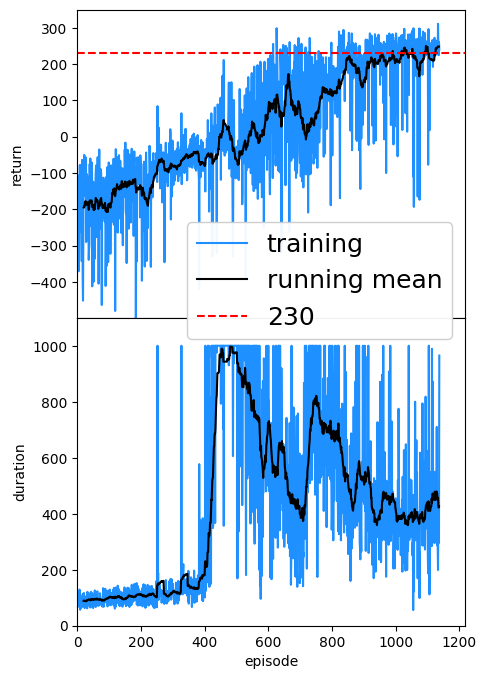

In [19]:
# Plot both the return per episode and the duration per episode during
# training, together with their running average over 20 consecutive episodes

N = 20 # number of episodes for running average

def running_mean(x,N=20):
        x_out = np.zeros(len(x)-N,dtype=float)
        for i in range(len(x)-N):
                x_out[i] = np.mean(x[i:i+N+1])
        return x_out
        
def plot_returns_and_durations(training_results,filename=None):
    fig,axes = plt.subplots(2,1,figsize=(5,8))
    fig.subplots_adjust(hspace=0.0001)
    #
    # return as a function of episode
    ax = axes[0]
    x = training_results['epsiode_returns']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(230,ls='--',
               label='230',
                        color='red')
    #
    ax.set_ylim(-499,350)
    ax.set_xticks([])
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'return')
    #
    #
    ax = axes[1]
    x = training_results['episode_durations']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(1200,ls='--', # draw line outside of plot scale, 
                label='230', # to get the red dotted line into the legend
                        color='red')
    #
    ax.set_ylim(0,1100)
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'duration')
    ax.legend(loc='upper right',bbox_to_anchor=(1.,1.35),
                                framealpha=0.95,
                        fontsize=18)
    #
    plt.show()
    if filename != None:
        fig.savefig(filename,bbox_inches='tight')
    plt.close(fig)

plot_returns_and_durations(training_results=training_results)

# Create gameplay video using trained agent

First we create a "live" video that pops up and shows Lunar Lander gameplay performed by the agent

In [20]:
# There is the issue that the game window freezes when running gym games 
# in jupyter notebooks, see https://github.com/openai/gym/issues/2433
# We here use the fix from that website, which is to use the following
# wrapper class:
class PyGameWrapper(gym.Wrapper):
    def render(self, **kwargs):
        retval = self.env.render( **kwargs)
        for event in pygame.event.get():
            pass
        return retval

In [25]:
# Create a wrapped environment
env = PyGameWrapper(gym.make('LunarLander-v3',render_mode='human'))

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        #env.render()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break
    
env.close()

Run 1: duration = 1000, total return = 124.081
Run 2: duration = 374, total return = 268.919
Run 3: duration = 434, total return = 236.967
Run 4: duration = 337, total return = 241.267
Run 5: duration = 395, total return = 215.389
Run 6: duration = 430, total return = 228.590
Run 7: duration = 1000, total return = 127.274
Run 8: duration = 356, total return = 226.538
Run 9: duration = 565, total return = 212.810
Run 10: duration = 609, total return = 226.579
Run 11: duration = 405, total return = 237.707
Run 12: duration = 423, total return = 250.498
Run 13: duration = 1000, total return = 103.455
Run 14: duration = 346, total return = 267.699
Run 15: duration = 358, total return = 226.225
Run 16: duration = 353, total return = 235.192
Run 17: duration = 334, total return = 236.746
Run 18: duration = 536, total return = 243.846
Run 19: duration = 426, total return = 241.103
Run 20: duration = 403, total return = 243.547


We also create a video file containing 20 games played by the agent

In [30]:
from gymnasium.wrappers import RecordVideo
env = gym.make('LunarLander-v3', render_mode="rgb_array")
env = RecordVideo(env, './demonstration', episode_trigger=lambda episode_number: True)

N_episodes = 40

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
   
        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break


env.close()

C:\Users\mauri\AppData\Roaming\Python\Python39\site-packages\gymnasium\wrappers\rendering.py:283: UserWarning: WARN: Overwriting existing videos at d:\bancas\lunar-lender\demonstration folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Run 1: duration = 360, total return = 223.887
Run 2: duration = 277, total return = 234.561
Run 3: duration = 255, total return = 245.607
Run 4: duration = 382, total return = 265.822
Run 5: duration = 430, total return = 250.027
Run 6: duration = 383, total return = 260.965
Run 7: duration = 437, total return = 237.020
Run 8: duration = 404, total return = 258.606
Run 9: duration = 167, total return = -16.175
Run 10: duration = 422, total return = 236.698
Run 11: duration = 354, total return = 224.979
Run 12: duration = 399, total return = 239.042
Run 13: duration = 321, total return = 262.155
Run 14: duration = 403, total return = 230.829
Run 15: duration = 298, total return = 209.949
Run 16: duration = 344, total return = 219.692
Run 17: duration = 405, total return = 253.898
Run 18: duration = 336, total return = 220.823
Run 19: duration = 160, total return =   3.517
Run 20: duration = 421, total return = 268.813
Run 21: duration = 476, total return = 234.843
Run 22: duration = 256